In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-dataset/Airline Dataset Updated.csv
/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv
/kaggle/input/airline-dataset/Airline Dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/airline-dataset/Airline Dataset Updated.csv')
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Passenger_ID', 'First_Name', 'Last_Name', 'Gender', 'Age',
       'Nationality', 'Airport_Name', 'Airport_Country_Code', 'Country_Name',
       'Airport_Continent', 'Continents', 'Departure_Date', 'Arrival_Airport',
       'Pilot_Name', 'Flight_Status'],
      dtype='object')

In [5]:
df['Departure_Date']=pd.to_datetime(df['Departure_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger_ID          98619 non-null  object        
 1   First_Name            98619 non-null  object        
 2   Last_Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport_Name          98619 non-null  object        
 7   Airport_Country_Code  98619 non-null  object        
 8   Country_Name          98619 non-null  object        
 9   Airport_Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure_Date        98619 non-null  datetime64[ns]
 12  Arrival_Airport       98619 non-null  object        
 13  Pilot_Name      

In [6]:
df.isnull().sum()

Passenger_ID            0
First_Name              0
Last_Name               0
Gender                  0
Age                     0
Nationality             0
Airport_Name            0
Airport_Country_Code    0
Country_Name            0
Airport_Continent       0
Continents              0
Departure_Date          0
Arrival_Airport         0
Pilot_Name              0
Flight_Status           0
dtype: int64

In [7]:
df.nunique()

Passenger_ID            98619
First_Name               8437
Last_Name               41658
Gender                      2
Age                        90
Nationality               240
Airport_Name             9062
Airport_Country_Code      235
Country_Name              235
Airport_Continent           6
Continents                  6
Departure_Date            364
Arrival_Airport          9024
Pilot_Name              98610
Flight_Status               3
dtype: int64

In [8]:
duplicates = df[df.duplicated(keep='first')]
print(duplicates)

Empty DataFrame
Columns: [Passenger_ID, First_Name, Last_Name, Gender, Age, Nationality, Airport_Name, Airport_Country_Code, Country_Name, Airport_Continent, Continents, Departure_Date, Arrival_Airport, Pilot_Name, Flight_Status]
Index: []


In [9]:
df[['Gender','Age','Passenger_ID']]

,Gender,Age,Passenger_ID
0,Female,62,ABVWIg
1,Male,62,jkXXAX
2,Male,67,CdUz2g
3,Female,71,BRS38V
4,Male,21,9kvTLo
...,...,...,...
98614,Male,85,hnGQ62
98615,Female,19,2omEzh
98616,Male,65,VUPiVG
98617,Female,34,E47NtS


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Gender', ylabel='Age'>

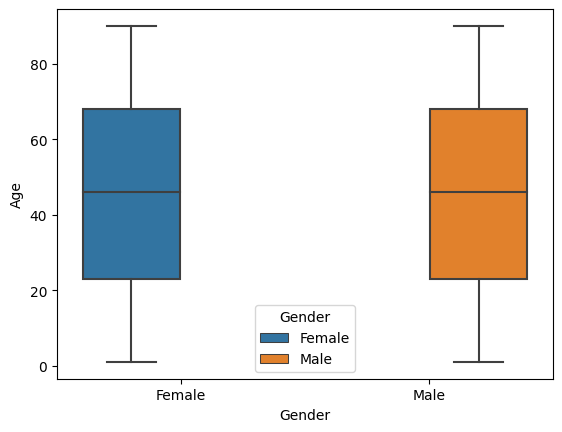

In [11]:
sns.boxplot(x='Gender',y='Age',data=df,hue='Gender')

In [12]:
#df[['Gender','Passenger_ID']].groupby('Gender',as_index=False).count().plot(kind='pie',y='Passenger_ID')

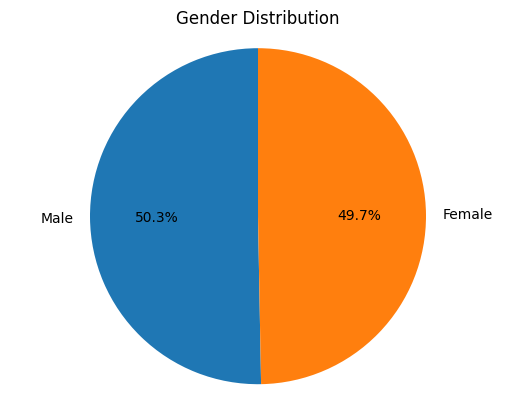

In [13]:
# Group the data by 'Gender' and count the number of occurrences
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Gender Distribution')

# Show the pie chart
plt.show()

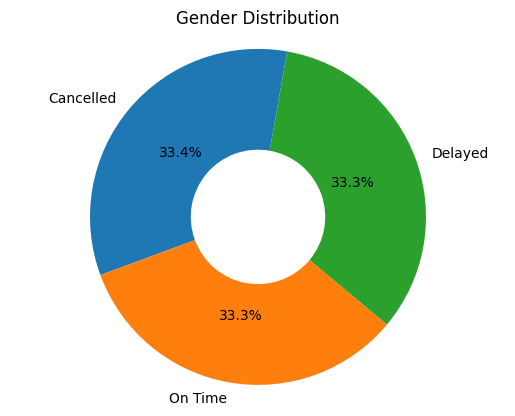

In [14]:
# Group the data by 'Gender' and count the number of occurrences
status_counts = df['Flight_Status'].value_counts()

# Create a pie chart
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=80, wedgeprops=dict(width=0.6))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Gender Distribution')

# Show the pie chart
plt.show()

In [15]:
df


,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Darrin Lucken,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled


<Axes: xlabel='Continents'>

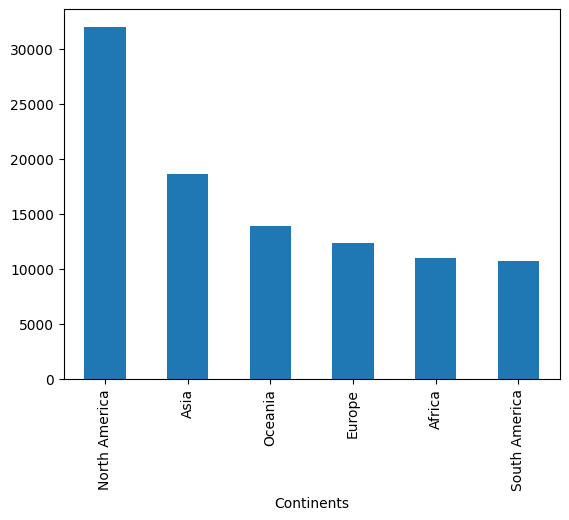

In [16]:
df['Continents'].value_counts().plot(kind='bar')

<Axes: xlabel='Nationality'>

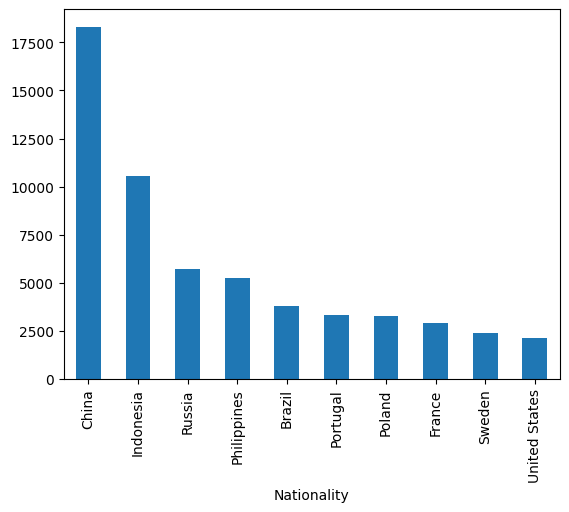

In [17]:
df['Nationality'].value_counts().head(10).plot(kind='bar')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


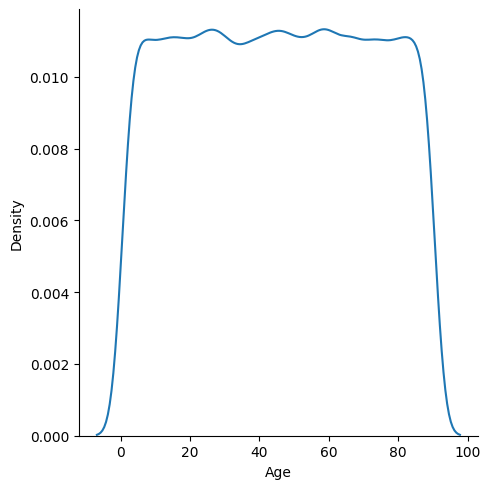

In [18]:
sns.displot(df['Age'],kind='kde')

In [19]:

    df["age_group"] = pd.cut(x=df['Age'], bins=[0,30,60,100], labels=["young","middle_aged","old"])
 

# Call function
df

,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status,age_group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,old
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,old
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,old
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,old
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled,old
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled,young
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Darrin Lucken,On Time,old
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled,middle_aged


<Axes: xlabel='age_group', ylabel='count'>

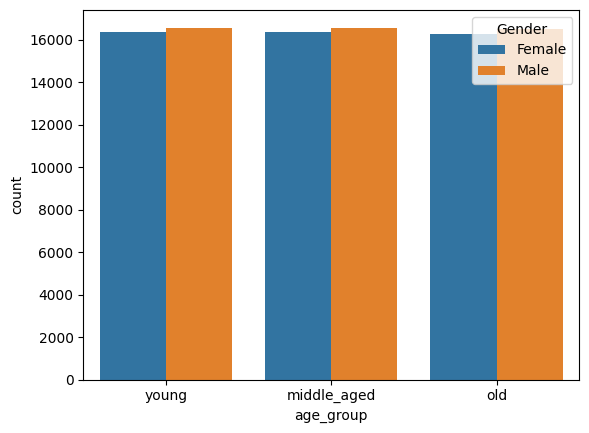

In [20]:
sns.countplot(x='age_group',data=df,hue='Gender')

<Axes: xlabel='Flight_Status', ylabel='count'>

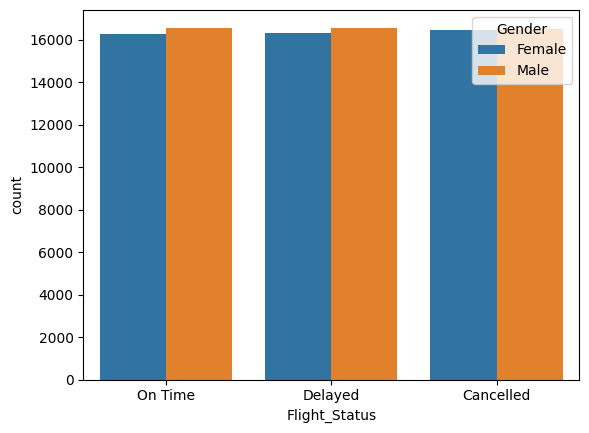

In [21]:
sns.countplot(x='Flight_Status',data=df,hue='Gender')

In [22]:
df[['Gender','Flight_Status']].groupby('Gender').value_counts()

Gender  Flight_Status
Female  Cancelled        16452
        Delayed          16291
        On Time          16278
Male    On Time          16568
        Delayed          16540
        Cancelled        16490
Name: count, dtype: int64

In [23]:
df.columns

Index(['Passenger_ID', 'First_Name', 'Last_Name', 'Gender', 'Age',
       'Nationality', 'Airport_Name', 'Airport_Country_Code', 'Country_Name',
       'Airport_Continent', 'Continents', 'Departure_Date', 'Arrival_Airport',
       'Pilot_Name', 'Flight_Status', 'age_group'],
      dtype='object')

col=[]

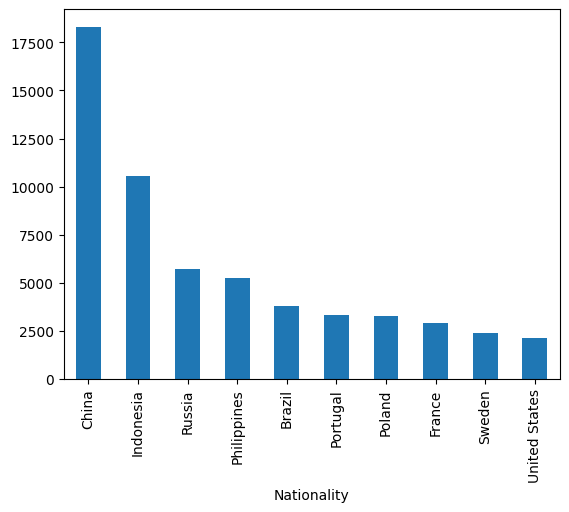

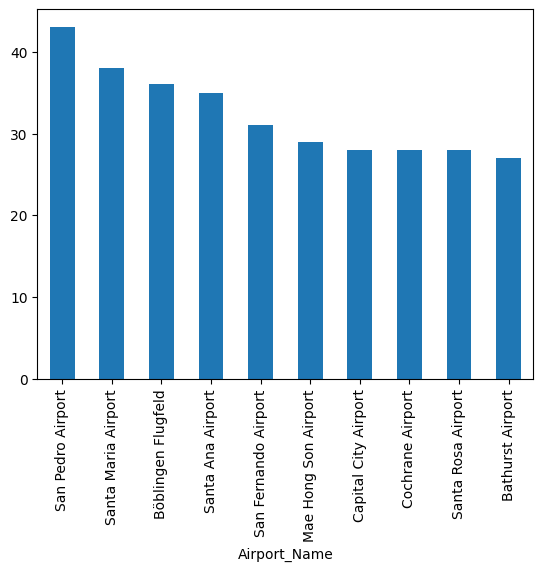

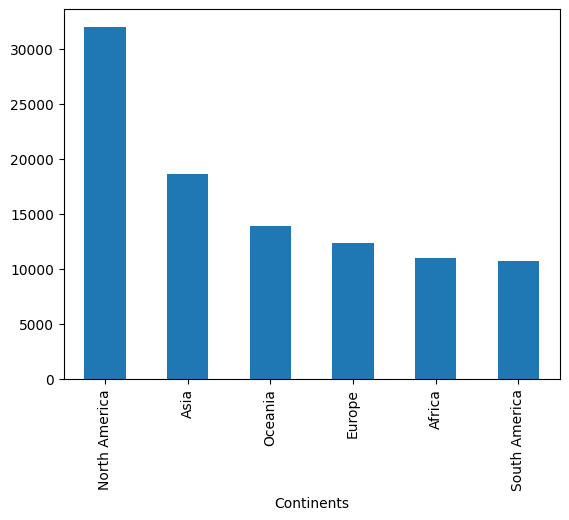

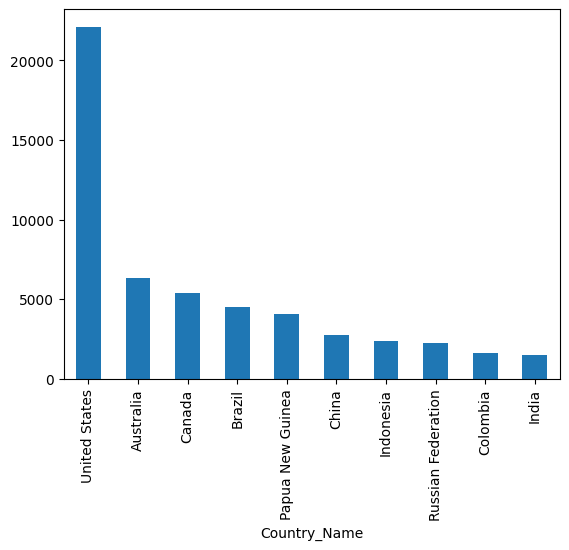

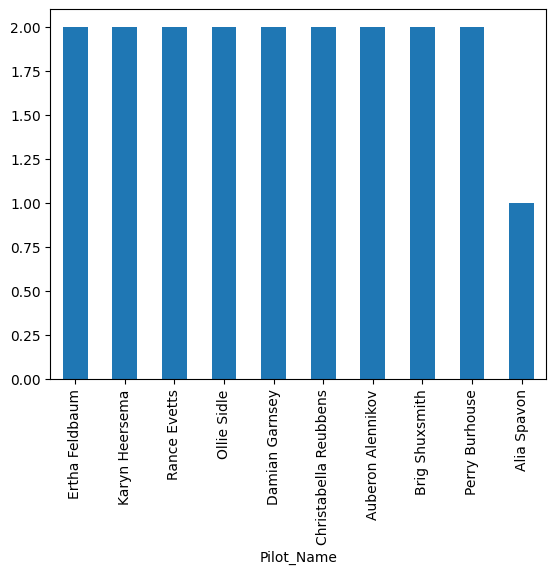

In [24]:
col=['Nationality','Airport_Name','Continents','Country_Name','Pilot_Name']

for i in col:
    plt.figure()
    df[i].value_counts().head(10).plot(kind='bar')
    

In [25]:
df


,Passenger_ID,First_Name,Last_Name,Gender,Age,Nationality,Airport_Name,Airport_Country_Code,Country_Name,Airport_Continent,Continents,Departure_Date,Arrival_Airport,Pilot_Name,Flight_Status,age_group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,old
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,old
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,old
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,old
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Gareth Mugford,Cancelled,old
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Kasey Benedict,Cancelled,young
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Darrin Lucken,On Time,old
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Gayle Lievesley,Cancelled,middle_aged


In [26]:
df['year']=df['Departure_Date'].dt.year
df['month']=df['Departure_Date'].dt.month
df['day']=df['Departure_Date'].dt.day
df['year'].unique()

array([2022], dtype=int32)

In [27]:
df_1=df[['month','Continents']].groupby('month',as_index=False).value_counts()

<Axes: xlabel='month', ylabel='count'>

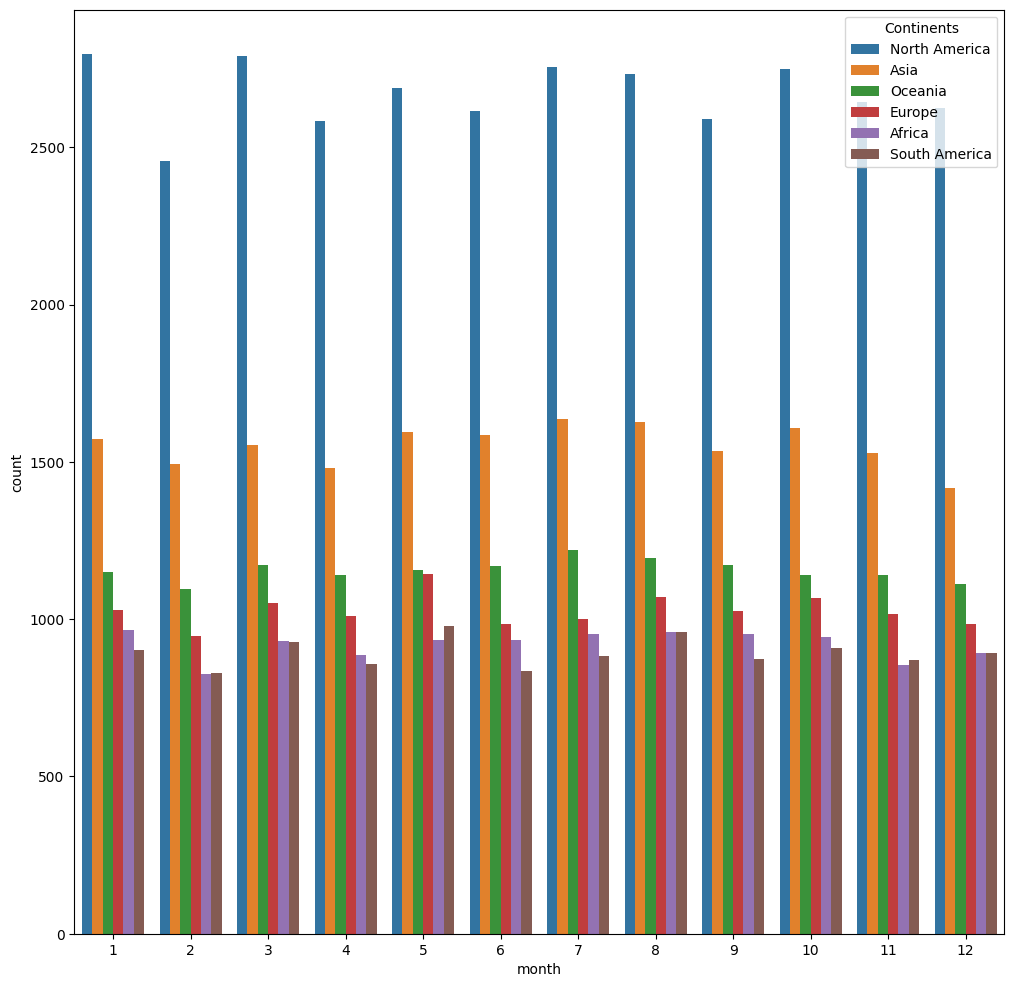

In [28]:
plt.figure(figsize=(12,12))
sns.barplot(x='month',y='count',hue='Continents',data=df_1)